In [1]:
!pip install pathlib

  Using cached pathlib-1.0.1-py3-none-any.whl.metadata (5.1 kB)
Using cached pathlib-1.0.1-py3-none-any.whl (14 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pathlib import Path
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = Path("data/images")
number_images = 30

---

# Collecting images 

In [ ]:
from pathlib import Path
import time
import uuid
import cv2

IMAGES_PATH = Path("data/images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)  # ✅ Create directory if it doesn't exist
number_images = 30
cap = cv2.VideoCapture(0)

for imgnum in range(number_images):
    print(f"Collecting image {imgnum}")
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    imgname = IMAGES_PATH / f"{uuid.uuid1()}.jpg"

    cv2.imwrite(str(imgname), frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


---

# Load Images

In [12]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [12]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)

In [14]:
images.as_numpy_iterator().next()

b'data\\images\\bd969bc8-437c-11f0-b216-dc2148bf0fc6.jpg'

In [14]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [16]:
images = images.map(load_image)

In [17]:
images.as_numpy_iterator().next()

array([[[215, 215, 207],
        [215, 215, 207],
        [215, 215, 207],
        ...,
        [169, 173, 159],
        [166, 172, 162],
        [175, 181, 171]],

       [[215, 215, 207],
        [215, 215, 207],
        [215, 215, 207],
        ...,
        [169, 172, 161],
        [168, 174, 164],
        [176, 182, 172]],

       [[215, 216, 210],
        [215, 216, 210],
        [215, 216, 210],
        ...,
        [170, 173, 164],
        [172, 175, 168],
        [178, 181, 174]],

       ...,

       [[148, 151, 156],
        [150, 153, 158],
        [154, 157, 162],
        ...,
        [167, 148, 131],
        [167, 145, 132],
        [190, 166, 156]],

       [[148, 149, 154],
        [150, 151, 156],
        [154, 155, 160],
        ...,
        [168, 152, 129],
        [165, 147, 127],
        [186, 167, 150]],

       [[151, 152, 157],
        [154, 155, 160],
        [158, 159, 164],
        ...,
        [170, 156, 129],
        [165, 149, 126],
        [184, 168, 145]]

In [18]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

---

# Visualise the images

In [24]:
image_generator = images.batch(4).as_numpy_iterator()

In [29]:
plot_images = image_generator.next()

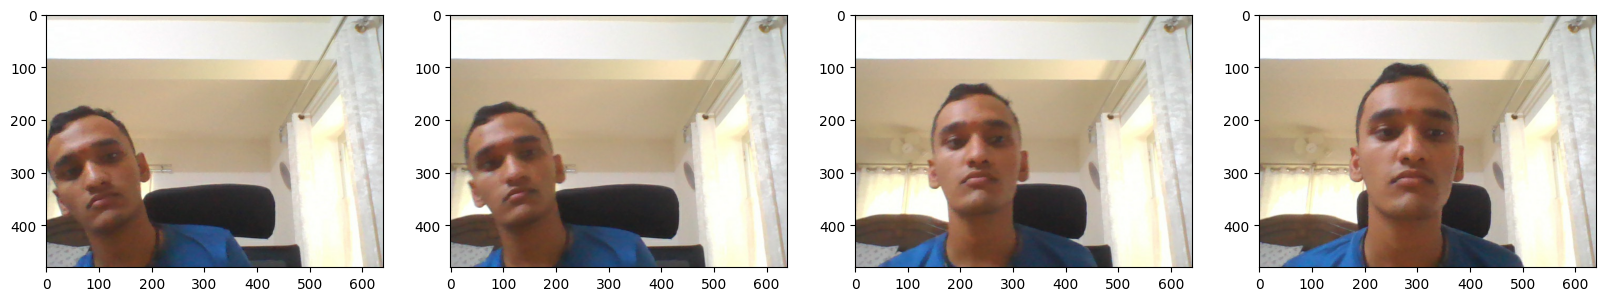

In [30]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

---

# Use MakeSense.ai to annotate the images

### Get the annotations in yolo format

---

# Manually partition data

### Initially the structure was 

```
data
|__images
|__labels
```

### Now partition the data into

```
data
|__images
|__labels
|__train
    |__images
    |__labels
|__test
    |__images
    |__labels
|__val
    |__images
    |__labels
```

Once the images have been moved, move the labels from data/labels to their respective folders 

In [32]:

90*0.7 # 63 for train

62.99999999999999

In [33]:
14 + 13 #14 for test 13 for val

27

In [ ]:
#move the labels into respective folders
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0]+'.txt'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(exiting_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [34]:
from pathlib import Path

# Define base path
base_path = Path('data')
labels_path = base_path / 'labels'

# Iterate over each folder: train, test, val
for folder_name in ['train', 'test', 'val']:
    image_folder = base_path / folder_name / 'images'
    label_folder = base_path / folder_name / 'labels'

    # Ensure label subfolder exists
    label_folder.mkdir(parents=True, exist_ok=True)

    # Iterate over all image files
    for image_file in image_folder.iterdir():
        if image_file.is_file():
            # Replace extension with .txt
            label_filename = image_file.with_suffix('.txt').name

            existing_label_path = labels_path / label_filename
            new_label_path = label_folder / label_filename

            if existing_label_path.exists():
                existing_label_path.replace(new_label_path)



.

---
---

---

# Apply Image Augmentation on Images and Labels using Albumentations

In [60]:
import albumentations as alb

In [100]:
img = cv2.imread(Path('data/train/images/e458e288-437c-11f0-bfc0-dc2148bf0fc6.jpg'))
img.shape

(480, 640, 3)

In [101]:
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
], bbox_params=alb.BboxParams(format='yolo', label_fields=['class_labels']))


### Load and test image annotations with opencv 

In [220]:
img_path = Path('data/train/images/be85121e-437c-11f0-a4c4-dc2148bf0fc6.jpg')
label_path = Path('data/train/labels/be85121e-437c-11f0-a4c4-dc2148bf0fc6.txt')

In [221]:
img = cv2.imread(img_path)
img

array([[[208, 216, 216],
        [208, 216, 216],
        [208, 216, 216],
        ...,
        [166, 173, 170],
        [166, 173, 168],
        [167, 174, 169]],

       [[209, 217, 217],
        [209, 217, 217],
        [209, 217, 217],
        ...,
        [165, 172, 169],
        [164, 171, 166],
        [164, 171, 166]],

       [[210, 218, 217],
        [210, 218, 217],
        [209, 217, 217],
        ...,
        [165, 172, 169],
        [163, 170, 165],
        [162, 169, 164]],

       ...,

       [[155, 153, 159],
        [161, 159, 165],
        [169, 165, 170],
        ...,
        [154, 158, 177],
        [148, 150, 168],
        [164, 164, 180]],

       [[151, 146, 155],
        [155, 151, 157],
        [162, 158, 163],
        ...,
        [150, 153, 174],
        [151, 152, 172],
        [159, 161, 179]],

       [[162, 157, 166],
        [162, 158, 164],
        [163, 159, 165],
        ...,
        [146, 151, 172],
        [157, 158, 178],
        [163, 164, 184]]

In [222]:
def load_yolo_labels(label_file_path):
    bboxes = []
    class_labels = []

    with open(label_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                bboxes.append([x_center, y_center, width, height])
                class_labels.append(class_id)
    
    return bboxes, class_labels

In [223]:
coords, class_labels = load_yolo_labels(label_path)
coords, class_labels

([[0.69535, 0.629227, 0.286232, 0.44686]], [0])

### Apply Augmentation and View result

In [224]:
augmented = augmentor(image = img, bboxes = coords, class_labels=class_labels)
augmented['bboxes']

[[0.7000533209906684,
  0.6311754480997722,
  0.4070855034722223,
  0.47665061950683596]]

In [225]:
def yolo_to_pixelcorner(bbox):
    # Convert YOLO to pixel corner format
    x_center, y_center, w, h = bbox
    x_center *= img_w
    y_center *= img_h
    w *= img_w
    h *= img_h
    
    x_min = int(x_center - w / 2)
    y_min = int(y_center - h / 2)
    x_max = int(x_center + w / 2)
    y_max = int(y_center + h / 2)

    return [x_min, y_min, x_max, y_max]

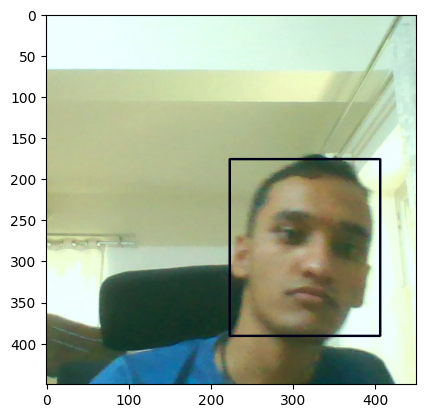

In [227]:
# Extract values from augmented result
aug_img = augmented['image']
bbox = augmented['bboxes'][0]  # in YOLO format: (x_center, y_center, w, h)
img_h, img_w = aug_img.shape[:2]

pixel_corners = yolo_to_pixelcorner(bbox)

# Draw box
cv2.rectangle(aug_img, (pixel_corners[0], pixel_corners[1]), (pixel_corners[2], pixel_corners[3]), (25, 0, 0), 2)

# Show image with box
plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
plt.show()

#

### Setup the pipeline

In [261]:
for partition in ['train','test','val']:
    for image in (Path('data') / partition / 'images').iterdir():
        img = cv2.imread(str(image))

        if img is None:
            print(f"Failed to read image : {image}")
            continue

        label_path = Path('data') / partition / 'labels' / f'{image.stem}.txt'
        bboxes = [[0.0005, 0.0005, 0.001, 0.001]]  # center at (0.0005, 0.0005), small width/height
        class_labels = [0]

        if label_path.exists():
            bboxes, class_labels = load_yolo_labels(label_path)
            print(f'{image.stem} ==> ',[class_labels[0]+1], bboxes)
        
        else:
            with open(Path('data') / partition / 'labels' /  f'{image.stem}.txt','w') as F:
                F.write("0 0.0005 0.0005 0.001 0.001\n")
                print(f'{image.stem} ==> ',class_labels, bboxes)
                

        try:
            for x in range(60):
                augmented = augmentor(image = img,
                                      bboxes = bboxes,
                                      class_labels=class_labels)

                #saving augmented image
                aug_image_path = Path('aug_data') / partition / 'images' / f'{image.stem}.{x}.jpg'
                cv2.imwrite(str(aug_image_path), augmented['image'])

                #save yolo formatted label
                aug_label_path = Path('aug_data') / partition / 'labels' / f'{image.stem}.{x}.txt'

                with open(aug_label_path, 'w') as f:
                    if augmented['bboxes']:
                        for i, bbox in enumerate(augmented['bboxes']):
                            class_id = 1
                            x_centre, y_centre, width, height = bbox
                            f.write(f"{class_id} {x_centre} {y_centre} {width} {height} \n")
                            # print(f'{image.stem}.txt ===> {class_id}')

                    else:
                        f.write("0 0.0005 0.0005 0.001 0.001\n")
                # print("\n")
        except Exception as e:
            print(f"Error augmenting {image.name} : {e}")

bd969bc8-437c-11f0-b216-dc2148bf0fc6 ==>  [1] [[0.482488, 0.580918, 0.28442, 0.437198]]
be374be4-437c-11f0-b40b-dc2148bf0fc6 ==>  [1] [[0.485205, 0.596618, 0.289855, 0.458937]]
be85121e-437c-11f0-a4c4-dc2148bf0fc6 ==>  [1] [[0.69535, 0.629227, 0.286232, 0.44686]]
bf20f0e8-437c-11f0-83d7-dc2148bf0fc6 ==>  [1] [[0.717995, 0.612319, 0.277174, 0.480676]]
bf6edce2-437c-11f0-bf4a-dc2148bf0fc6 ==>  [1] [[0.467089, 0.589372, 0.318841, 0.483092]]
bfbce395-437c-11f0-9512-dc2148bf0fc6 ==>  [1] [[0.281401, 0.599034, 0.353261, 0.444444]]
c0f3edd7-437c-11f0-9281-dc2148bf0fc6 ==>  [1] [[0.429952, 0.509662, 0.338768, 0.594203]]
c1418eeb-437c-11f0-a131-dc2148bf0fc6 ==>  [1] [[0.50151, 0.518116, 0.344203, 0.615942]]
c18ef98c-437c-11f0-a522-dc2148bf0fc6 ==>  [1] [[0.582126, 0.560386, 0.302536, 0.507246]]
c1dcc111-437c-11f0-956f-dc2148bf0fc6 ==>  [1] [[0.637379, 0.611111, 0.228261, 0.439614]]
c22ad4b6-437c-11f0-9099-dc2148bf0fc6 ==>  [1] [[0.602959, 0.631643, 0.228261, 0.39372]]
c361d2e0-437c-11f0-96bf-dc

### Load augmented images to Tensorflow

In [15]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [16]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [17]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [265]:
train_images.as_numpy_iterator().next()

array([[[0.24313726, 0.47659314, 0.7613358 ],
        [0.24313726, 0.48400736, 0.7759804 ],
        [0.2689951 , 0.47254902, 0.7776348 ],
        ...,
        [0.99607843, 1.        , 0.9852941 ],
        [0.9887255 , 0.9892157 , 0.99019605],
        [0.9898897 , 0.98498774, 0.9158701 ]],

       [[0.24332108, 0.44852942, 0.7439338 ],
        [0.2485294 , 0.46715686, 0.75735295],
        [0.25459558, 0.4745098 , 0.76329654],
        ...,
        [0.99607843, 1.        , 0.98615193],
        [0.9990809 , 0.9995711 , 0.9995711 ],
        [0.97702205, 0.95906866, 0.8941789 ]],

       [[0.25422794, 0.44638482, 0.74442405],
        [0.259375  , 0.45545343, 0.7430147 ],
        [0.275     , 0.4642157 , 0.74607843],
        ...,
        [0.9925858 , 1.        , 0.9886642 ],
        [0.9985907 , 0.99356616, 0.99607843],
        [0.94577205, 0.8990196 , 0.84430146]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

---

# Prepare labels

In [18]:
def new_load_yolo_labels(label_file_path):

    label_file_path = label_file_path.numpy().decode('utf-8')  # ✅ Add this line
    
    bboxes = []
    class_labels = []

    with open(label_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                bboxes.append([x_center, y_center, width, height])
                class_labels.append(class_id)
    
    return (
        np.array(class_labels, dtype=np.uint8),
        np.array(bboxes, dtype=np.float32)
    )

### Load labels to tensorflow dataset

In [19]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.txt', shuffle =  False)
train_labels = train_labels.map(lambda x: tf.py_function(new_load_yolo_labels, [x], [tf.uint8, tf.float16]))

In [20]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.txt', shuffle =  False)
test_labels = test_labels.map(lambda x: tf.py_function(new_load_yolo_labels, [x], [tf.uint8, tf.float16]))

In [21]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.txt', shuffle =  False)
val_labels = val_labels.map(lambda x: tf.py_function(new_load_yolo_labels, [x], [tf.uint8, tf.float16]))

In [270]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([[0.2152, 0.6743, 0.4304, 0.505 ]], dtype=float16))

### Combine labels and image samples

In [271]:
#Check if no of images and labels match
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4140, 4140, 960, 960, 900, 900)

In [22]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [23]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [24]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [275]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[[1.272e-01, 7.612e-01, 2.544e-01, 4.775e-01]],
 
        [[7.334e-01, 5.229e-01, 5.332e-01, 8.398e-01]],
 
        [[5.002e-04, 5.002e-04, 1.000e-03, 1.000e-03]],
 
        [[5.219e-02, 3.516e-01, 1.044e-01, 3.838e-01]],
 
        [[4.639e-01, 5.254e-01, 5.566e-01, 8.398e-01]],
 
        [[5.002e-04, 5.002e-04, 1.000e-03, 1.000e-03]],
 
        [[4.097e-01, 7.070e-01, 2.859e-01, 3.503e-01]],
 
        [[6.958e-02, 2.769e-01, 1.392e-01, 4.329e-01]]], dtype=float16))

### Viewing images and annotations

In [93]:
data_samples = train.as_numpy_iterator()

In [126]:
res = data_samples.next()

In [95]:
def yolo_to_pixelcorner(bbox, img_w, img_h):
    x_center, y_center, w, h = bbox
    x_center *= img_w
    y_center *= img_h
    w *= img_w
    h *= img_h

    x_min = int(x_center - w / 2)
    y_min = int(y_center - h / 2)
    x_max = int(x_center + w / 2)
    y_max = int(y_center + h / 2)

    return [x_min, y_min, x_max, y_max]


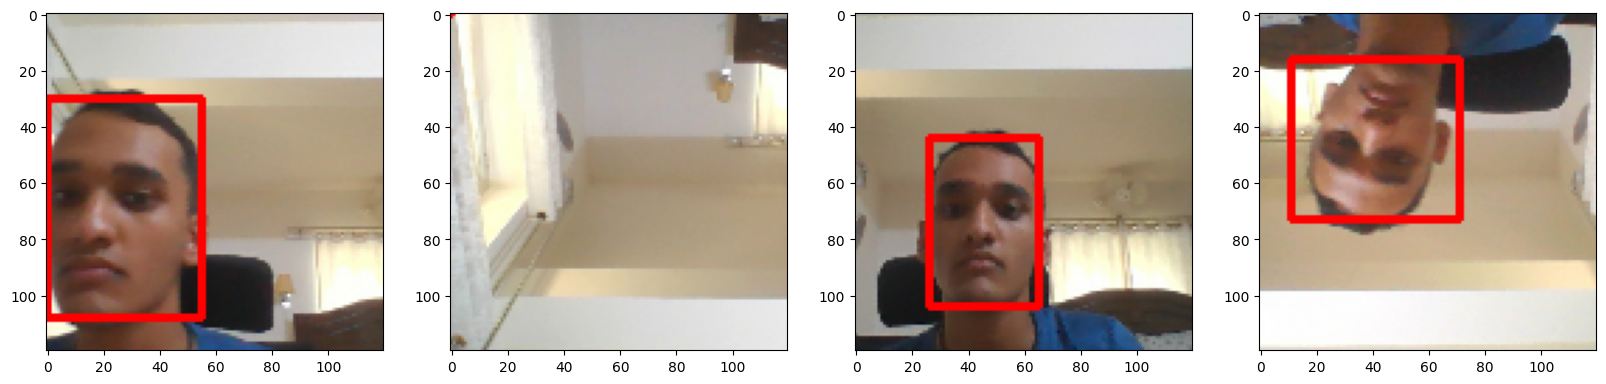

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx].flatten()

    pixel_corners = yolo_to_pixelcorner(sample_coords, 120, 120)

    cv2.rectangle(sample_image, (pixel_corners[0], pixel_corners[1]), (pixel_corners[2], pixel_corners[3]), (25, 0, 0), 2)

    ax[idx].imshow(sample_image)

---

# Build DL model using Functional API

In [97]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### Donwload VGG16

In [98]:
vgg = VGG16(include_top= False)

In [99]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### Building an instance of the Netowrk

In [1]:
def build_model():
    input_layer = Input(shape = (120,120,3))

    vgg = VGG16(include_top= False)(input_layer)

    #Classification model (for images)
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    #Regression model (for bbox)
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs = input_layer, outputs = [class2, regress2])
    return facetracker

### Instantiating the netowork

In [101]:
facetracker = build_model()

In [102]:
facetracker.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 120, 120, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 3, 3, 512)         │      14,714,688 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_4        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_5        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_4[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_5[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 1)                 │           2,049 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 4)                 │           8,196 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

### Trial run

In [103]:
X, y = train.as_numpy_iterator().next()

In [104]:
X.shape

(8, 120, 120, 3)

In [105]:
y[1]

array([[[2.333e-02, 3.713e-01, 4.666e-02, 4.766e-01]],

       [[1.506e-01, 4.099e-01, 3.013e-01, 6.465e-01]],

       [[5.002e-04, 5.002e-04, 1.000e-03, 1.000e-03]],

       [[3.645e-01, 4.895e-01, 4.895e-01, 6.572e-01]],

       [[5.002e-04, 5.002e-04, 1.000e-03, 1.000e-03]],

       [[4.658e-01, 2.366e-01, 2.396e-01, 2.808e-01]],

       [[4.229e-01, 3.906e-01, 3.916e-01, 5.386e-01]],

       [[4.272e-01, 4.961e-01, 5.464e-01, 7.446e-01]]], dtype=float16)

In [106]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


In [107]:
classes, coords

(array([[0.53772295],
        [0.512871  ],
        [0.49926588],
        [0.47219574],
        [0.48800346],
        [0.4203156 ],
        [0.4149982 ],
        [0.46516967]], dtype=float32),
 array([[0.48113233, 0.53351223, 0.621747  , 0.39044905],
        [0.5172893 , 0.5597944 , 0.55818486, 0.3958692 ],
        [0.4704172 , 0.4649787 , 0.5304008 , 0.4644284 ],
        [0.5454331 , 0.45164794, 0.5879543 , 0.3720998 ],
        [0.4608587 , 0.53685415, 0.53699523, 0.40614244],
        [0.48029023, 0.5347272 , 0.5728864 , 0.37805814],
        [0.4896471 , 0.5042237 , 0.4391375 , 0.43207648],
        [0.610054  , 0.57210267, 0.5099165 , 0.43703324]], dtype=float32))

---

# Define losses and optimizers

### Define Optimizer

In [108]:
batches_per_epoc = len(train)
lr_decay = (1./0.75 - 1)/batches_per_epoc

In [109]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = lr_decay)

D:\Learning\AI-ML-DL stuff\T3 - Deep Face Detection Model\facedet\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### Create localization loss and classification loss

In [115]:
def localization_loss(y_true, yhat):
    y_true = tf.squeeze(y_true, axis=1)

    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [116]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### Test out Loss Metrics

In [117]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float16, numpy=2.236328125>

In [118]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7389007210731506>

In [119]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float16, numpy=2.236328125>

---

# Train the Network

In [120]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        X, y = batch
    
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
    
            y_true_cls = tf.cast(y[0], tf.float32)
            y_true_cls = tf.reshape(y_true_cls, tf.shape(classes))  # ✅ Shape match
            
            batch_classloss = self.closs(y_true_cls, classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
    
            total_loss = batch_localizationloss + 0.5 * batch_classloss
    
        grad = tape.gradient(total_loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))
    
        return {
            "total_loss": total_loss,
            "class_loss": batch_classloss,
            "regress_loss": batch_localizationloss
        }

    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        y_true_cls = tf.cast(y[0], tf.float32)
        y_true_cls = tf.reshape(y_true_cls, tf.shape(classes))  # ✅ Shape match
        
        batch_classloss = self.closs(y_true_cls, classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [121]:
model = FaceTracker(facetracker)

In [122]:
model.compile(opt, classloss, regressloss)

### Train

In [123]:
logdir='logs'

In [124]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [125]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
518/518 ━━━━━━━━━━━━━━━━━━━━ 599s 1s/step - class_loss: 0.1318 - regress_loss: 0.5098 - total_loss: 0.5757 - val_class_loss: 0.0108 - val_regress_loss: 0.0268 - val_total_loss: 0.0322
Epoch 2/40
518/518 ━━━━━━━━━━━━━━━━━━━━ 598s 1s/step - class_loss: 0.0577 - regress_loss: 0.1813 - total_loss: 0.2102 - val_class_loss: 0.0019 - val_regress_loss: 0.0389 - val_total_loss: 0.0398
Epoch 3/40
518/518 ━━━━━━━━━━━━━━━━━━━━ 593s 1s/step - class_loss: 0.0469 - regress_loss: 0.1658 - total_loss: 0.1892 - val_class_loss: 0.1526 - val_regress_loss: 0.4405 - val_total_loss: 0.5168
Epoch 4/40
518/518 ━━━━━━━━━━━━━━━━━━━━ 594s 1s/step - class_loss: 0.0352 - regress_loss: 0.1006 - total_loss: 0.1181 - val_class_loss: 0.0022 - val_regress_loss: 0.0095 - val_total_loss: 0.0106
Epoch 5/40
518/518 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - class_loss: 0.0402 - regress_loss: 0.1191 - total_loss: 0.1392 - val_class_loss: 0.0053 - val_regress_loss: 0.0086 - val_total_loss: 0.0112
Epoch 6/40
518/518 ━━━━━━

### Plot performance

In [127]:
hist.history

{'class_loss': [0.022561801597476006,
  0.012493433430790901,
  0.006402068771421909,
  0.0036305042449384928,
  0.0005588895874097943,
  0.009647315368056297,
  0.003609651466831565,
  0.0006214356981217861,
  1.3927167401561746e-06,
  0.0001857089519035071,
  0.004205293487757444,
  0.003433261066675186,
  0.0027632059063762426,
  0.00036211375845596194,
  0.008017179556190968,
  0.007141248323023319,
  0.002313802484422922,
  0.0008065722649917006,
  0.007241394370794296,
  4.564669507090002e-05,
  0.014165333472192287,
  0.006900960113853216,
  1.103855013847351,
  5.286988653097069e-06,
  0.0014663436450064182,
  0.002781033283099532,
  0.007801824249327183,
  1.7636525626585353e-06,
  0.01850012317299843,
  0.0008506362210027874,
  4.93959742016159e-05,
  0.00013778072025161237,
  0.0017805371899157763,
  2.9561360861407593e-05,
  1.9829385564662516e-06,
  4.727914529212285e-06,
  0.0008726852247491479,
  1.1478568922029808e-06,
  0.0006193351582624018,
  0.0010151934111490846],


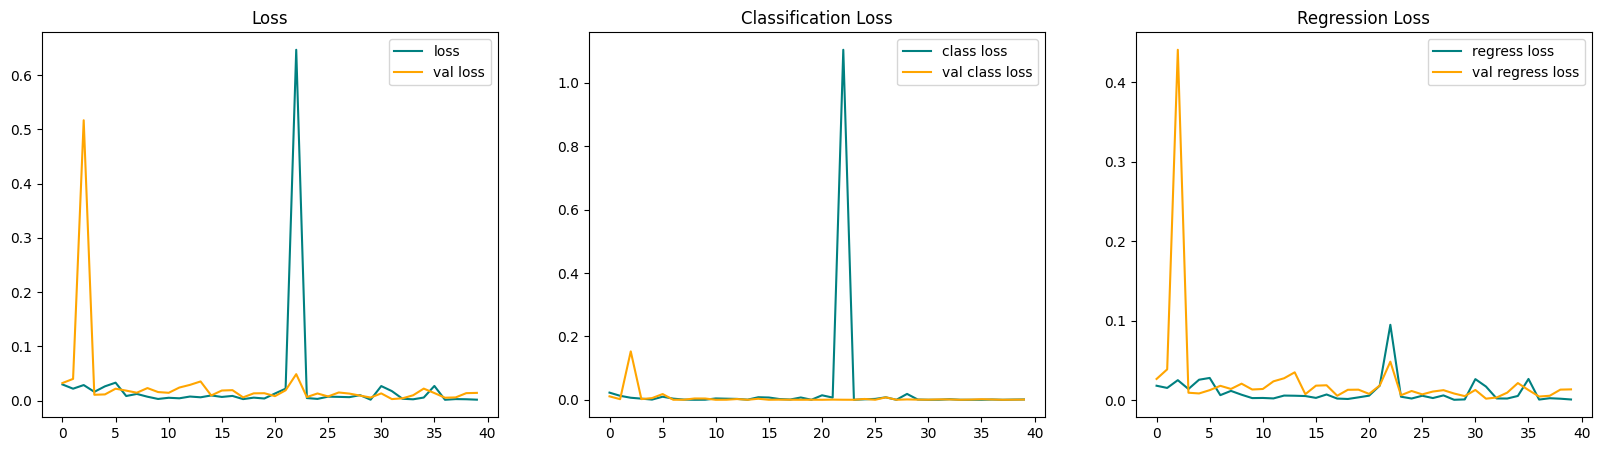

In [128]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

---

# Make predictions

In [129]:
test_data = test.as_numpy_iterator()

In [134]:
test_sample = test_data.next()

In [135]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


In [136]:
def yolo_to_pixelcorner(bbox, img_w, img_h):
    x_center, y_center, w, h = bbox
    x_min = int((x_center - w / 2) * img_w)
    y_min = int((y_center - h / 2) * img_h)
    x_max = int((x_center + w / 2) * img_w)
    y_max = int((y_center + h / 2) * img_h)
    return [x_min, y_min, x_max, y_max]


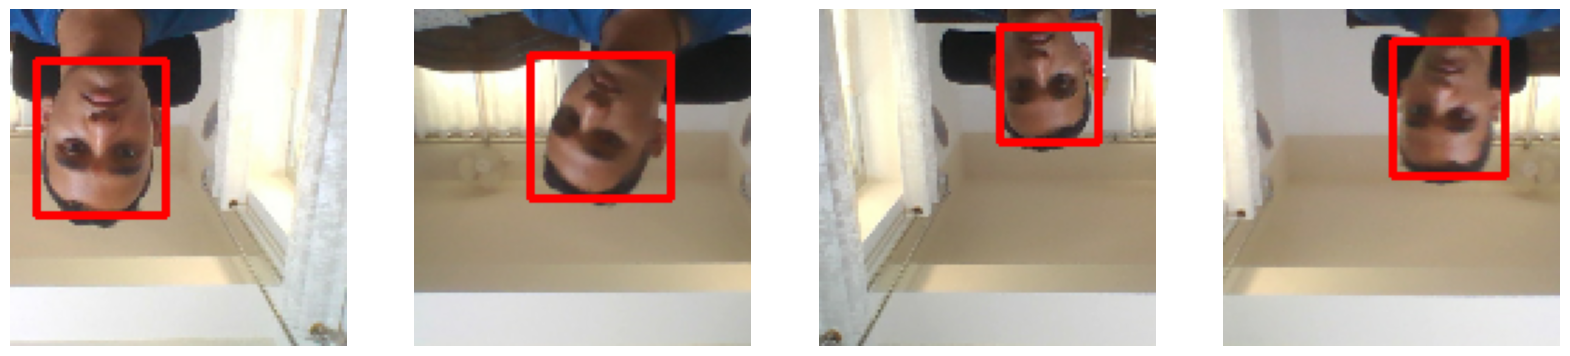

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    sample_image = test_sample[0][idx].copy()  # Copy to make it writable
    sample_coords = yhat[1][idx]

    # Draw only if class confidence is high
    if yhat[0][idx] > 0.9:
        pixel_corners = yolo_to_pixelcorner(sample_coords, 120, 120)

        cv2.rectangle(sample_image,
                      (pixel_corners[0], pixel_corners[1]),
                      (pixel_corners[2], pixel_corners[3]),
                      (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')


---

# Save the Model

In [77]:
from tensorflow.keras.models import load_model

In [80]:
facetracker.save('facetracker.keras')

---

# Realtime testing

In [139]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    _, frame = cap.read()
    frame = frame[50:500, 50:500, :]  # Crop 450x450 region
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))

    # Run prediction
    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    class_conf = yhat[0][0]
    sample_coords = yhat[1][0]

    if class_conf > 0.5:
        # Convert YOLO format to pixel corner coordinates
        x_min, y_min, x_max, y_max = yolo_to_pixelcorner(sample_coords, 450, 450)

        # Main bounding box
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

        # Label background rectangle
        cv2.rectangle(frame,
                      (x_min, y_min - 30),
                      (x_min + 80, y_min),
                      (255, 0, 0), -1)

        # Text label
        cv2.putText(frame, 'face', (x_min, y_min - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/